# Fuel Consumption

This is a regression problem. Please download the dataset as follows:

In [15]:
!git clone https://github.com/cvrg-iyte/DATA602repo.git
import pandas as pd
names = ['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acc', 'year', 'origin', 'carname']
data = pd.read_csv("./DATA602repo/fuel-consumption.data", delim_whitespace=True, names=names)

fatal: destination path 'DATA602repo' already exists and is not an empty directory.


Aim is to predict miles per gallon (mpg) fuel consumption for vehicles. Thus, mpg column is your target variable. You need to predict mpg as close as possible with the provided variables (you do not have to use all the variables).

First, start by analyzing the dataset for numerical and non-numerical values, if it contains values between different ranges and if it has any missing values.
You may need to preprocess the dataset to ensure that we are only feeding numerical values to the machine learning model for predictions.

You are expected to try several regression methods we have seen in the lectures (not only Linear Regression but also Support Vector Reg., Regresstion Trees etc.) and compare them. Also, you are supposed to apply best practices we have seen such as hyperparameter selection, cross validation and regularization.

In [16]:
data.head(5)

,mpg,cylinders,displacement,hp,weight,acc,year,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Analyzing the dataset for numerical and non-numerical values, checking for value ranges, and identifying missing values:

In [17]:
import pandas as pd

# Load the dataset
names = ['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acc', 'year', 'origin', 'carname']
data = pd.read_csv("./DATA602repo/fuel-consumption.data", delim_whitespace=True, names=names)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())

# Information about the dataset, including data types and non-null counts
print("\nInformation about the dataset:")
print(data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Check unique values in non-numerical columns
non_numeric_columns = data.select_dtypes(exclude='number').columns
print("\nUnique values in non-numerical columns:")
for column in non_numeric_columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

# Check value ranges for numerical columns
print("\nValue ranges for numerical columns:")
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        min_value = data[column].min()
        max_value = data[column].max()
        print(f"{column}: Min={min_value}, Max={max_value}")


First few rows of the dataset:
    mpg  cylinders  displacement     hp  weight   acc  year  origin  \
0  18.0          8         307.0  130.0  3504.0  12.0    70       1   
1  15.0          8         350.0  165.0  3693.0  11.5    70       1   
2  18.0          8         318.0  150.0  3436.0  11.0    70       1   
3  16.0          8         304.0  150.0  3433.0  12.0    70       1   
4  17.0          8         302.0  140.0  3449.0  10.5    70       1   

                     carname  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  

Summary statistics for numerical columns:
              mpg   cylinders  displacement       weight         acc  \
count  398.000000  398.000000    398.000000   398.000000  398.000000   
mean    23.514573    5.454774    193.425879  2970.424623   15.568090   
std      7.815984    1.701004    104.269838   846.841774    2.757689   
min      9.000000    3.00

# Preprocess the dataset:

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
names = ['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acc', 'year', 'origin', 'carname']
data = pd.read_csv("./DATA602repo/fuel-consumption.data", delim_whitespace=True, names=names)

# Drop non-numeric columns (e.g., 'carname') for simplicity
data_numeric = data.drop(['carname'], axis=1)

# Convert non-numeric columns to numeric or handle them appropriately
# if 'hp' column has non-numeric values, convert them to NaN and then fill missing values
data_numeric['hp'] = pd.to_numeric(data_numeric['hp'], errors='coerce')

# Handle missing values by imputing with mean or any other strategy
data_numeric.fillna(data_numeric.mean(numeric_only=True), inplace=True)

# Split the data into features (X) and the target variable (y)
X = data_numeric.drop(['mpg'], axis=1)
y = data_numeric['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test set
linear_y_pred = linear_model.predict(X_test)

# Evaluate the Linear Regression model
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f"Linear Regression Mean Squared Error: {linear_mse}")


Linear Regression Mean Squared Error: 8.195452104073787


# Support Vector Regression (SVR):

In [20]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the SVR model
svr_model = make_pipeline(StandardScaler(), SVR())

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Predict on the test set
svr_y_pred = svr_model.predict(X_test)

# Evaluate the SVR model
svr_mse = mean_squared_error(y_test, svr_y_pred)
print(f"SVR Mean Squared Error: {svr_mse}")


SVR Mean Squared Error: 6.815285840878874


# Decision Tree Regression:

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Predict on the test set
tree_y_pred = tree_model.predict(X_test)

# Evaluate the Decision Tree model
tree_mse = mean_squared_error(y_test, tree_y_pred)
print(f"Decision Tree Mean Squared Error: {tree_mse}")


Decision Tree Mean Squared Error: 11.552125


# CrossValidation and Hyperparameter Tuning (Ridge Regression)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge Regression with hyperparameter tuning
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1, 10]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_ridge_model = grid_search.best_estimator_

# Predict on the test set
ridge_y_pred = best_ridge_model.predict(X_test)

# Evaluate the Ridge Regression model
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f"Ridge Regression Mean Squared Error: {ridge_mse}")


Ridge Regression Mean Squared Error: 8.245578921140924


# Model Comparision:

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)

# Support Vector Regression (SVR)
svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)

# Ridge Regression with hyperparameter tuning
ridge_model = Ridge(alpha=1)  # the best alpha found in the previous grid search
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)

# Compare MSE of different models
models_mse = {
    'Linear Regression': linear_mse,
    'SVR': svr_mse,
    'Decision Tree Regression': tree_mse,
    'Ridge Regression': ridge_mse
}

# Display MSE for each model
print("Mean Squared Error for each model:")
for model, mse in models_mse.items():
    print(f"{model}: {mse}")

Mean Squared Error for each model:
Linear Regression: 8.195452104073787
SVR: 6.815285840878874
Decision Tree Regression: 11.343625
Ridge Regression: 8.200657319077886


# Cross-Validation for Robust Comparision:

In [24]:
# cross-validation to get a more robust comparison
def cross_val(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    return -scores.mean()

# Compare cross-validated MSE
print("\nCross-validated Mean Squared Error for each model:")
for model in [linear_model, svr_model, tree_model, ridge_model]:
    mse_cv = cross_val(model, X, y)
    print(f"{type(model).__name__}: {mse_cv}")


Cross-validated Mean Squared Error for each model:
LinearRegression: 15.114704491154868
Pipeline: 13.927771016444803
DecisionTreeRegressor: 15.12296170886076
Ridge: 15.117027741351952


# Regularization:

In [25]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

# Ridge Regression with hyperparameter tuning using cross-validation
ridge_cv_model = RidgeCV(alphas=[0.1, 1, 10], store_cv_values=True)
ridge_cv_model.fit(X_train, y_train)

# Best alpha selected by RidgeCV
best_alpha = ridge_cv_model.alpha_

# Ridge Regression with the best alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)

# Compare MSE of different models (including Ridge with best alpha)
models_mse['Ridge Regression (CV)'] = ridge_mse

# Display MSE for each model
print("Mean Squared Error for each model:")
for model, mse in models_mse.items():
    print(f"{model}: {mse}")

# Additionally, you can use cross-validation to get a more robust comparison
print("\nCross-validated Mean Squared Error for each model:")
for model in [linear_model, svr_model, tree_model, ridge_model]:
    mse_cv = cross_val(model, X, y)
    print(f"{type(model).__name__}: {mse_cv}")


Mean Squared Error for each model:
Linear Regression: 8.195452104073787
SVR: 6.815285840878874
Decision Tree Regression: 11.343625
Ridge Regression: 8.200657319077886
Ridge Regression (CV): 8.245578921140924

Cross-validated Mean Squared Error for each model:
LinearRegression: 15.114704491154868
Pipeline: 13.927771016444803
DecisionTreeRegressor: 14.239438291139242
Ridge: 15.138583269787034


#  R-squared (R2):

In [26]:
from sklearn.metrics import r2_score

# Calculate R2 for Linear Regression
linear_r2 = r2_score(y_test, linear_y_pred)
print(f"Linear Regression R2: {linear_r2}")

# Calculate R2 for SVR
svr_r2 = r2_score(y_test, svr_y_pred)
print(f"SVR R2: {svr_r2}")

# Calculate R2 for Decision Tree Regression
tree_r2 = r2_score(y_test, tree_y_pred)
print(f"Decision Tree R2: {tree_r2}")

# Calculate R2 for Ridge Regression
ridge_r2 = r2_score(y_test, ridge_y_pred)
print(f"Ridge Regression R2: {ridge_r2}")

Linear Regression R2: 0.8475731044779433
SVR R2: 0.8732427632266664
Decision Tree R2: 0.7890203590041233
Ridge Regression R2: 0.8466407977533214


# visualization:

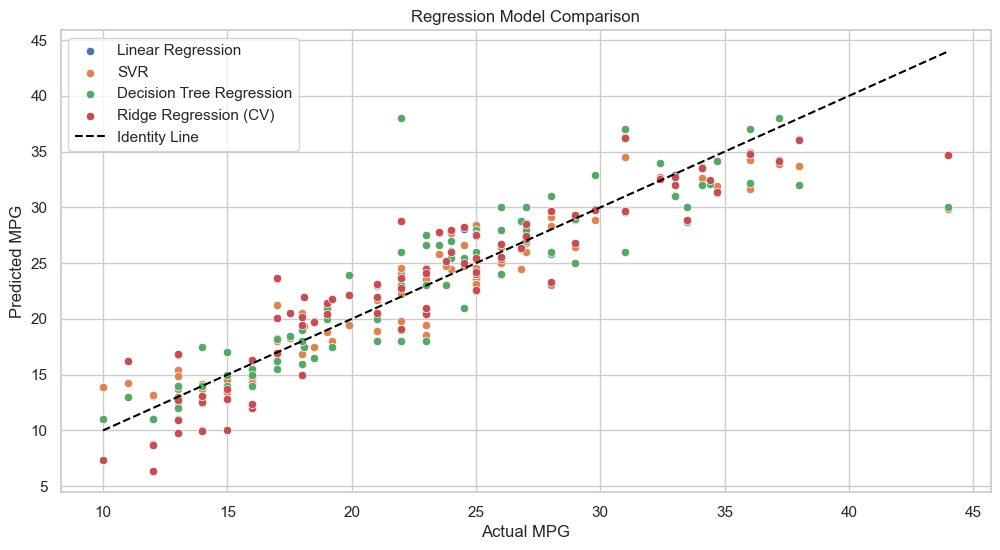

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create a DataFrame for visualization
results = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': linear_y_pred,
    'SVR': svr_y_pred,
    'Decision Tree Regression': tree_y_pred,
    'Ridge Regression (CV)': ridge_y_pred
})

# Plot the results
plt.figure(figsize=(12, 6))

for model in results.columns[1:]:
    sns.scatterplot(x='Actual', y=model, data=results, label=model)

# Plot the identity line (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Identity Line')

plt.title('Regression Model Comparison')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.legend()
plt.show()